<a href="https://colab.research.google.com/github/Noorjahan-C/ASAP-AIML-TOT/blob/main/SVM_4_Pillars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Support Vector Machines (SVM): Theory and Python Implementation

**Author:** Noorjahan  
**Domain:** Machine Learning Foundations  
**Algorithm:** Support Vector Machines (SVM)

---

> 📌 **Objective**  
> This notebook provides a **conceptual and practical walkthrough** of Support Vector Machines, integrating mathematical intuition with hands-on Python implementation.



### **Introduction**

Support Vector Machines (SVMs) are supervised learning algorithms used for classification and regression.  
They are built on strong mathematical principles and provide excellent generalization performance.

In this notebook, we cover:
- Mathematical intuition behind SVMs
- Linear and kernel-based SVM models
- Python implementation using scikit-learn
- Visualization of decision boundaries## 📖 Introduction

Support Vector Machines (SVMs) are **powerful supervised learning algorithms** widely used for classification and regression tasks.  
They are particularly valued for their **strong theoretical guarantees** and **excellent generalization ability**.

### 🔍 What this notebook covers
- 🧮 Mathematical intuition behind SVMs  
- 🧑‍💻 Step-by-step Python implementation  
- 📊 Visualization of decision boundaries  
- 🧠 Interpretation of model behavior  

This notebook is designed for **students, researchers, and practitioners** seeking both *theory* and *practice*.



## 🧩 Mathematical Foundations of SVM
### 🧮 Linear Algebra Perspective  
From a linear algebra standpoint, SVMs interpret data geometrically. Each input sample is represented as a vector in a high-dimensional feature space, and the entire dataset forms a matrix where rows correspond to samples and columns correspond to features.

The central goal of an SVM is to find a hyperplane that separates data points belonging to different classes. This hyperplane is defined by a weight vector and a bias term. Classification is achieved by computing the dot product between the input vectors and the weight vector, followed by an offset. This operation determines on which side of the hyperplane a data point lies.

In the case of non-linearly separable data, SVMs rely on kernel functions, which implicitly map data into higher-dimensional spaces where linear separation becomes possible. These kernel-induced transformations are purely linear algebraic operations, demonstrating how linear algebra enables powerful feature transformations without explicitly computing them.



Each data point is represented as a vector in a high-dimensional space.  
SVM aims to find a hyperplane:

wᵀx + b = 0

that best separates data points from different classes.

---

### 📊 Statistical Perspective

Statistics provides the rationale for why SVMs generalize well to unseen data. Instead of merely minimizing classification error on the training set, SVMs aim to maximize the margin—the distance between the separating hyperplane and the closest data points from each class (support vectors).

This margin maximization embodies a statistical principle: models with larger margins tend to have lower generalization error. By focusing only on a subset of critical points (the support vectors), SVMs reduce sensitivity to noise and outliers.

In soft-margin SVMs, a regularization parameter balances the trade-off between maximizing the margin and allowing misclassifications. This reflects a statistical bias–variance trade-off, ensuring robustness when data are noisy or overlapping.

---

### 📐 Calculus Perspective

Although SVMs are often solved using convex optimization techniques, calculus plays a crucial role in understanding their learning dynamics. The objective function in SVMs consists of a regularization term and a loss function—commonly the hinge loss.

The gradient (or subgradient) of this loss function with respect to the model parameters indicates how changes in the parameters affect classification performance. These gradient-based insights allow iterative methods to update parameters efficiently.

In large-scale or online learning scenarios, gradient-based solvers such as stochastic gradient descent rely directly on calculus to adjust model parameters, highlighting how differentiation enables systematic learning rather than heuristic tuning.



SVM uses the **hinge loss**:

L(y, f(x)) = max(0, 1 − y f(x))

Gradients (or subgradients) of this loss guide parameter updates.

---

### ⚙️ Optimization Perspective

Optimization theory provides the framework that makes SVMs both efficient and reliable. The SVM training problem is formulated as a convex optimization problem, meaning it has a single global optimum and no local minima.

This convexity guarantees that optimization algorithms converge to the best possible solution. Depending on the formulation, SVMs can be solved using quadratic programming, dual optimization, or gradient-based methods.

Optimization principles guide critical design choices, such as selecting regularization parameters, choosing appropriate kernels, and determining convergence criteria. These choices ensure that training is computationally efficient while maintaining high predictive performance.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


This cell imports all the required Python libraries:
- **NumPy** for numerical computations
- **Matplotlib** for visualization
- **scikit-learn** for dataset loading, model building, and evaluation

`SVC` is the Support Vector Classifier used to implement SVM models.


In [2]:
# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Select first two features for visualization
y = iris.target

# Convert to binary classification (class 0 vs class 1)
X = X[y != 2]
y = y[y != 2]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In this step:
- The **Iris dataset** is loaded as a sample classification problem.
- Only two features are selected to allow easy visualization of decision boundaries.
- The problem is converted into **binary classification**.
- The dataset is split into training and testing sets to evaluate generalization performance.


## Training a Linear SVM

We begin with a linear kernel, which attempts to separate the classes using a straight-line decision boundary.


In [3]:
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)


SVC(kernel='linear')

## 📈 Training a Linear SVM

A **linear SVM** attempts to separate data using a straight-line (or hyperplane) decision boundary.

### 🔧 Key Parameters
- **Kernel:** Linear  
- **C:** Regularization parameter controlling margin vs misclassification

We begin with this simplest form of SVM to build intuition.


In [4]:
y_pred = svm_linear.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 📊 Model Evaluation

The trained model is evaluated using:
- **Accuracy** – overall correctness
- **Precision & Recall** – class-wise performance
- **F1-score** – balance between precision and recall

> 🎯 Evaluation on unseen data helps assess real-world performance.


## 🖼️ Visualizing the Decision Boundary

Visualization provides geometric intuition into SVM behavior.

### What we observe:
- The **decision boundary** (hyperplane)
- The **margin**
- Distribution of training samples

> 📐 Only a few critical points — **support vectors** — define the boundary.


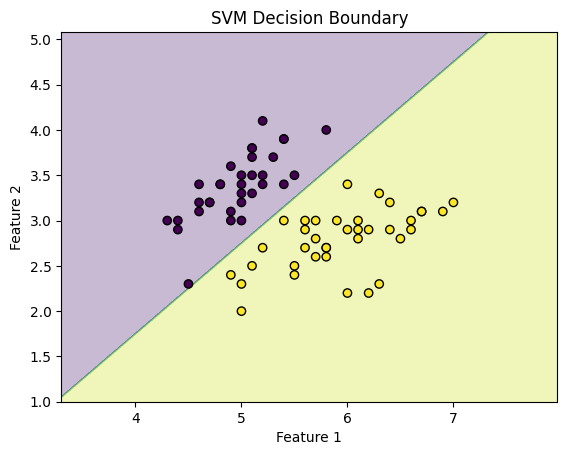

In [5]:
def plot_decision_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("SVM Decision Boundary")
    plt.show()

plot_decision_boundary(svm_linear, X_train, y_train)


This function:
- Creates a grid over the feature space
- Predicts class labels for each grid point
- Visualizes the **decision boundary** and training samples

This demonstrates how SVM constructs a separating hyperplane based on support vectors.


In [7]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)
print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))


RBF Kernel Accuracy: 1.0


## 🌐 Kernel SVM (RBF Kernel)

Real-world data is often **not linearly separable**.  
Kernel functions enable SVMs to model **non-linear decision boundaries**.

### 🌀 RBF Kernel Highlights
- Implicitly maps data to higher dimensions
- Captures complex patterns
- Controlled by the `gamma` parameter

This allows SVMs to remain powerful even in complex feature spaces.


## 🧠 Interpretation of Results

✔ Linear SVM performs well for linearly separable data  
✔ Kernel SVM captures non-linear structures  
✔ Only **support vectors** influence the decision boundary  
✔ Margin maximization improves robustness  

> ✨ SVM decisions are driven by geometry, not sheer data volume.


## ✅ Conclusion

Support Vector Machines elegantly integrate:

- 🧮 **Linear Algebra** — feature representation & hyperplanes  
- 📊 **Statistics** — margin-based generalization  
- 📐 **Calculus** — loss functions & gradients  
- ⚙️ **Optimization** — convex learning guarantees  

SVMs remain a **cornerstone of classical machine learning**, combining strong theory with practical performance.
